**<div style="background-color:#B0EADC"><center><span style="color:gray;">Default Loans Prediction</span></center></div>**

<center><img src="https://i.gifer.com/8ESB.gif"></center>

# <center><span style="color:#A8AD10;">Calling the libraries and the data</span></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
path= "../input/bondora-peer-to-peer-lending-loan-data/LoanData_Bondora.csv"
data= pd.read_csv(path, low_memory=False)

# <center><span style="color:#A8AD10;">Data Exploration and Preprocessing</span></center>

In [3]:
data.shape

(179235, 112)

*We have 179235 lines of data and 112 columns*

In [4]:
#for i in range(112):
#    print(data.columns[i])

### The features we have :
* ReportAsOfEOD: EOD stands for End of the Day. It points to the top of a trading day in financial markets, the purpose in time when the trading ceases for the day. It's also referred to as end of business, close of business and close of play.

- LoanId

- LoanNumber

- ListedOnUTC: Date when the loan application appeared on Primary Market

- BiddingStartedOn: A bid is an offer made by an investor, trader, or dealer in an effort to buy an asset or to compete for a contract.

- BidsPortfolioManager.

- BidsApi.

- BidsManual.

- UserName.

- NewCreditCustomer.

- LoanApplicationStartedDate.

- LoanDate.

- ContractEndDate.

- FirstPaymentDate.

- MaturityDate_Original: The time between the issue and the maturity date for a particular bond.

- MaturityDate_Last.

- ApplicationSignedHour.

- ApplicationSignedWeekday.

- VerificationType.

- LanguageCode.

- Age.

- DateOfBirth.

- Gender.

- Country.

- AppliedAmount.

- Amount.

- Interest.

- LoanDuration.

- MonthlyPayment.

- County.

- City.

- UseOfLoan.

- Education.

- MaritalStatus.

- NrOfDependants.

- etc...

In [5]:
#for i in data.columns:
#    print(i,data[i].isnull().sum())

### <span style="color:red"> alot of features have more than 90% null Let's drop them</span>

In [6]:
list_of_50_percent_null = [ ]
for i in data.columns:
    if data[i].isnull().sum() >= (90*179235)/100:
        list_of_50_percent_null.append(i)

In [7]:
list_of_50_percent_null

['DateOfBirth',
 'County',
 'City',
 'EmploymentPosition',
 'EL_V0',
 'Rating_V0',
 'EL_V1',
 'Rating_V1',
 'CreditScoreEsEquifaxRisk']

In [8]:
data = data.drop(list_of_50_percent_null, axis=1)

In [9]:
print(data.describe().transpose())

                                           count          mean            std  \
LoanNumber                              179235.0  1.239306e+06  661026.577241   
BidsPortfolioManager                    179235.0  7.979625e+02    1235.509764   
BidsApi                                 179235.0  2.743234e+01     147.568318   
BidsManual                              179235.0  4.995448e+02     714.723996   
ApplicationSignedHour                   179235.0  1.332526e+01       4.995317   
...                                          ...           ...            ...   
PreviousEarlyRepaymentsCountBeforeLoan  179226.0  6.268622e-02       0.340707   
NextPaymentNr                           112291.0  5.673491e+00       8.472659   
NrOfScheduledPayments                   112291.0  5.363377e+01      12.393257   
PrincipalDebtServicingCost               76150.0  9.291100e+00      75.611465   
InterestAndPenaltyDebtServicingCost      76150.0  1.583544e+02     366.688541   

                           

In [10]:
data.dtypes

ReportAsOfEOD                           object
LoanId                                  object
LoanNumber                               int64
ListedOnUTC                             object
BiddingStartedOn                        object
                                        ...   
NrOfScheduledPayments                  float64
ReScheduledOn                           object
PrincipalDebtServicingCost             float64
InterestAndPenaltyDebtServicingCost    float64
ActiveLateLastPaymentCategory           object
Length: 103, dtype: object

In [11]:
names= data.columns

# <center><span style="color:#A8AD10;"> Exploration for Object and Bool data types</span></center>

In [12]:
cat_data= data.select_dtypes('object')
data = data.drop(cat_data.columns, axis=1)

bool_data= data.select_dtypes('bool')
data = data.drop(bool_data.columns, axis=1)

In [13]:
cat_data

,ReportAsOfEOD,LoanId,ListedOnUTC,BiddingStartedOn,UserName,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,...,Status,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreFiAsiakasTietoRiskGrade,GracePeriodStart,GracePeriodEnd,NextPaymentDate,ReScheduledOn,ActiveLateLastPaymentCategory
0,2021-07-20,66AE108B-532B-4BB3-BAB7-0019A46412C1,2016-03-23 16:07:19,2016-03-23 16:07:19,BO965519,2016-03-17 12:39:22,2016-03-23,2020-06-26,2016-05-12,2021-04-12,...,Late,180+,180+,NaN,NaN,2019-10-28,2020-01-27,NaN,NaN,31-60
1,2021-07-20,D152382E-A50D-46ED-8FF2-0053E0C86A70,2015-06-25 11:02:28,2015-06-25 11:02:28,BOA9K172A,2015-06-24 12:36:16,2015-06-25,NaN,2015-08-17,2020-07-17,...,Late,180+,180+,NaN,NaN,NaN,NaN,NaN,NaN,180+
2,2021-07-20,87342E13-66CB-483F-833A-007953E50C78,2016-01-14 10:00:21,2016-01-14 10:00:21,BO7971663,2016-01-07 15:37:16,2016-01-19,2019-10-24,2016-02-22,2021-01-20,...,Repaid,180+,180+,NaN,NaN,NaN,NaN,NaN,NaN,180+
3,2021-07-20,87227056-6BF9-410C-98D1-008F788E122A,2015-03-24 15:55:44,2015-03-24 15:55:44,BO76151K3,2015-03-20 15:20:48,2015-03-27,NaN,2015-05-04,2020-04-01,...,Late,180+,180+,M3,NaN,NaN,NaN,NaN,NaN,180+
4,2021-07-20,2DDE6336-E466-4624-A337-00A0ED1A1468,2015-12-17 10:12:00,2015-12-17 10:12:00,BOK423A63,2015-12-13 00:30:08,2015-12-22,NaN,2016-02-01,2020-01-02,...,Late,180+,180+,M5,NaN,NaN,NaN,NaN,NaN,180+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179230,2021-07-20,D9E714C3-B9B8-4FD1-B1AD-FF55B3AE8A8F,2015-03-02 07:07:05,2015-03-02 07:07:05,BO6492A4A,2015-02-19 13:36:36,2015-03-02,NaN,2015-04-15,2020-03-16,...,Late,180+,180+,NaN,RL2,NaN,NaN,NaN,NaN,180+
179231,2021-07-20,09999223-3D69-42E3-BAAA-FF7F312AB236,2016-02-17 10:17:35,2016-02-17 10:17:35,BO542A57A,2016-02-17 09:16:05,2016-02-18,2017-09-19,2016-03-23,2021-02-23,...,Repaid,NaN,NaN,NaN,RL2,NaN,NaN,NaN,NaN,NaN
179232,2021-07-20,370193A5-D19C-4A99-97F7-FF95BEA52731,2016-02-05 09:35:26,2016-02-05 09:35:26,BO65A965,2016-02-04 15:41:12,2016-02-10,2016-04-21,2016-04-01,2021-03-01,...,Repaid,NaN,16-30,M4,NaN,NaN,NaN,NaN,NaN,NaN
179233,2021-07-20,98D9FCCE-0FD7-420E-9F7F-FFA960669E8B,2015-08-17 17:23:05,2015-08-17 17:23:05,BO9577433,2015-08-12 12:29:10,2015-08-17,2020-09-10,2015-10-12,2020-09-10,...,Repaid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
bool_data

,NewCreditCustomer,ActiveScheduleFirstPaymentReached,Restructured
0,False,True,False
1,False,True,False
2,True,True,False
3,True,True,False
4,True,True,False
...,...,...,...
179230,True,True,False
179231,False,True,False
179232,False,True,False
179233,True,True,False


### <span style="color:red"> Fill the object data that have less then 90% null</span>

In [15]:
cat_data =cat_data.fillna("unknown")

In [16]:
date_type= cat_data["BiddingStartedOn"].astype('datetime64[ns]')
cat_data= cat_data.drop(['BiddingStartedOn'],axis=1)

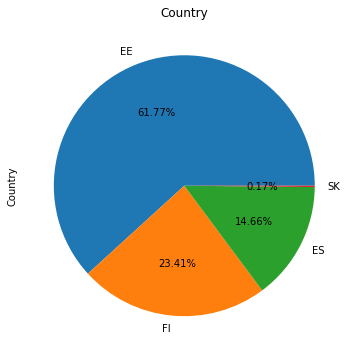

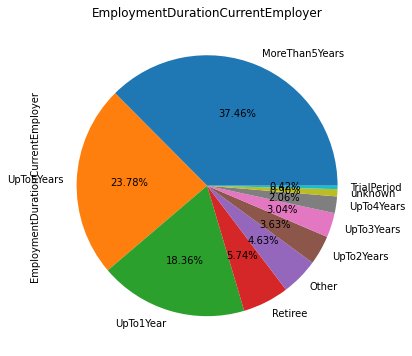

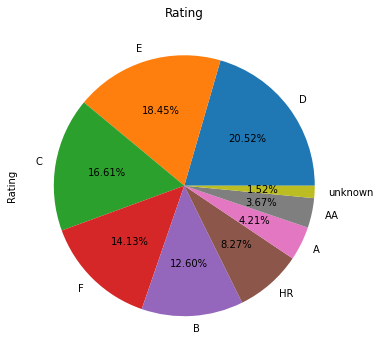

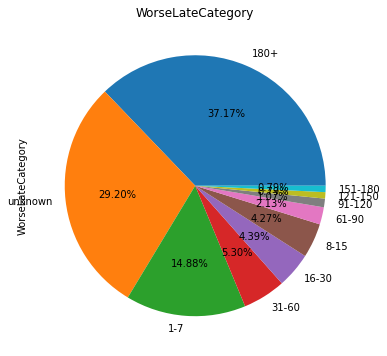

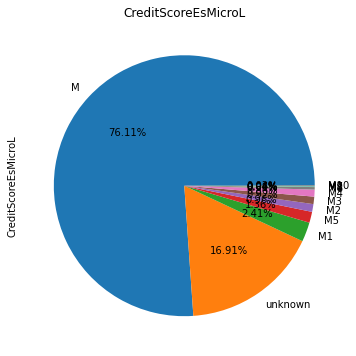

In [17]:
features_cat_data= list(cat_data.columns)
features_cat_data_viz= ["Country","EmploymentDurationCurrentEmployer","Rating","WorseLateCategory",
                   "CreditScoreEsMicroL"]
for i in features_cat_data_viz:
    cat_data[i].value_counts().plot(kind='pie', figsize=(6,6), autopct="%1.2f%%")
    plt.title(i)
    plt.show()


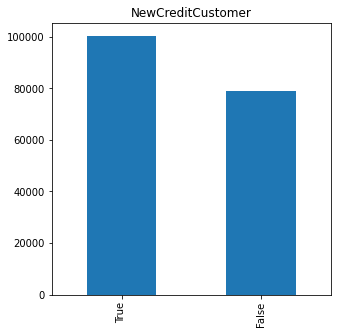

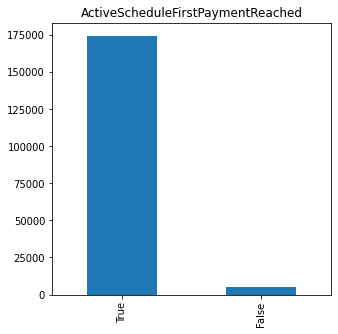

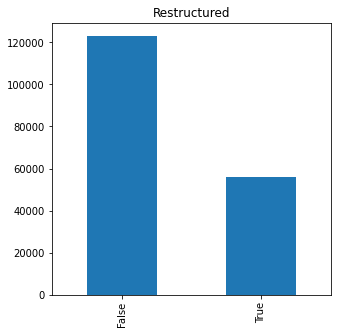

In [18]:
features_bool_data= list(bool_data.columns)
features_bool_data_viz= ["NewCreditCustomer", "ActiveScheduleFirstPaymentReached","Restructured"]
for i in features_bool_data_viz:
    bool_data[i].value_counts().plot(kind='bar', figsize=(5,5))
    plt.title(i)
    plt.show()

# <center><span style="color:#A8AD10;"> Preprocessing for Object and Bool data types</span></center>

In [19]:
cat_array= np.array(cat_data).reshape(-1)
bool_array= np.array(bool_data).reshape(-1)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder_1= LabelEncoder()
encoder_2= LabelEncoder()

In [22]:
cat_enc= encoder_1.fit_transform(cat_array)
bool_enc= encoder_2.fit_transform(bool_array)

In [23]:
cat_enc= pd.DataFrame(cat_enc.reshape(179235,int(cat_enc.shape[0]/179235)))
bool_enc= pd.DataFrame(bool_enc.reshape(179235,int(bool_enc.shape[0]/179235)))

In [24]:
cat_enc.columns= features_cat_data
bool_enc.columns= features_bool_data

In [25]:
object_data = pd.concat([cat_enc,bool_enc], axis=1)


In [26]:
object_data

,ReportAsOfEOD,LoanId,ListedOnUTC,UserName,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,...,CreditScoreEsMicroL,CreditScoreFiAsiakasTietoRiskGrade,GracePeriodStart,GracePeriodEnd,NextPaymentDate,ReScheduledOn,ActiveLateLastPaymentCategory,NewCreditCustomer,ActiveScheduleFirstPaymentReached,Restructured
0,442936,493740,65066,617325,64754,65019,342892,67743,397352,342892,...,685972,685972,269555,307836,685972,685972,456091,0,1,0
1,442936,649499,52716,627398,52683,52704,685972,55242,345576,345576,...,685972,685972,685972,685972,685972,685972,16778,0,1,0
2,442936,516505,61551,610980,61261,61739,267810,63344,376157,376157,...,685972,685972,685972,685972,685972,685972,16778,1,1,0
3,442936,516446,49131,608887,48942,49270,685972,50821,331086,331086,...,682751,685972,685972,685972,685972,685972,16778,1,1,0
4,442936,453833,60460,631617,60275,60636,685972,62257,298077,298077,...,682753,685972,685972,685972,685972,685972,16778,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179230,442936,655491,48004,599722,47583,48000,685972,50096,327447,327447,...,685972,683068,685972,685972,685972,685972,16778,1,1,0
179231,442936,6596,63145,591271,63140,63210,106197,65019,384645,384645,...,685972,683068,685972,685972,685972,685972,685972,0,1,0
179232,442936,460268,62539,600670,62508,62767,66658,65507,385892,385892,...,682752,685972,685972,685972,685972,685972,685972,0,1,0
179233,442936,528761,55292,616704,55077,55242,351957,57524,351957,351957,...,685972,685972,685972,685972,685972,685972,685972,1,1,0


# <center><span style="color:#A8AD10;"> Exploration for Numerical data </span></center>

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
data

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,...,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
0,483449,970,1150,5.0,17,4,4.0,1,53,1.0,...,433.60,1.0,500.0,590.95,0.0,0.0,NaN,NaN,0.00,51.73
1,378148,1295,0,1705.0,11,5,1.0,1,50,1.0,...,2291.82,1.0,1800.0,445.26,3000.0,1.0,NaN,NaN,0.00,47.08
2,451831,2700,565,5835.0,22,3,4.0,1,44,0.0,...,0.00,0.0,0.0,0.00,0.0,0.0,NaN,NaN,259.67,1659.60
3,349381,1115,0,385.0,15,3,3.0,6,42,0.0,...,2833.83,0.0,0.0,0.00,1500.0,1.0,NaN,NaN,0.00,215.05
4,443082,305,0,785.0,20,3,4.0,6,34,1.0,...,4215.37,0.0,0.0,0.00,0.0,0.0,NaN,NaN,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179230,323749,2000,0,0.0,7,2,1.0,4,38,1.0,...,4284.86,0.0,0.0,0.00,0.0,0.0,NaN,NaN,0.00,18.38
179231,468598,6215,70,1155.0,11,5,4.0,4,37,0.0,...,0.00,2.0,2500.0,986.78,0.0,0.0,NaN,NaN,0.00,0.00
179232,462572,430,0,1055.0,14,4,1.0,6,37,0.0,...,0.00,3.0,2425.0,2749.65,1200.0,1.0,NaN,NaN,0.00,0.00
179233,396046,3000,0,0.0,20,2,1.0,3,58,1.0,...,0.00,0.0,0.0,0.00,0.0,0.0,NaN,NaN,0.00,0.00


### <span style="color:red"> Fill the object data that have less then 90% null</span>

In [29]:
names_num = data.columns
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(np.array(data))
imp_data= imp_median.transform(data)
data= pd.DataFrame(imp_data)
data.columns= names_num

In [30]:
data

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,...,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
0,483449.0,970.0,1150.0,5.0,17.0,4.0,4.0,1.0,53.0,1.0,...,433.60,1.0,500.0,590.95,0.0,0.0,2.0,60.0,0.00,51.73
1,378148.0,1295.0,0.0,1705.0,11.0,5.0,1.0,1.0,50.0,1.0,...,2291.82,1.0,1800.0,445.26,3000.0,1.0,2.0,60.0,0.00,47.08
2,451831.0,2700.0,565.0,5835.0,22.0,3.0,4.0,1.0,44.0,0.0,...,0.00,0.0,0.0,0.00,0.0,0.0,2.0,60.0,259.67,1659.60
3,349381.0,1115.0,0.0,385.0,15.0,3.0,3.0,6.0,42.0,0.0,...,2833.83,0.0,0.0,0.00,1500.0,1.0,2.0,60.0,0.00,215.05
4,443082.0,305.0,0.0,785.0,20.0,3.0,4.0,6.0,34.0,1.0,...,4215.37,0.0,0.0,0.00,0.0,0.0,2.0,60.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179230,323749.0,2000.0,0.0,0.0,7.0,2.0,1.0,4.0,38.0,1.0,...,4284.86,0.0,0.0,0.00,0.0,0.0,2.0,60.0,0.00,18.38
179231,468598.0,6215.0,70.0,1155.0,11.0,5.0,4.0,4.0,37.0,0.0,...,0.00,2.0,2500.0,986.78,0.0,0.0,2.0,60.0,0.00,0.00
179232,462572.0,430.0,0.0,1055.0,14.0,4.0,1.0,6.0,37.0,0.0,...,0.00,3.0,2425.0,2749.65,1200.0,1.0,2.0,60.0,0.00,0.00
179233,396046.0,3000.0,0.0,0.0,20.0,2.0,1.0,3.0,58.0,1.0,...,0.00,0.0,0.0,0.00,0.0,0.0,2.0,60.0,0.00,0.00


In [31]:
#data.hist(figsize=(20,20))

In [32]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LoanNumber,179235.0,1.239306e+06,661026.577241,37.0,712538.0,1096557.0,1.851458e+06,2313298.00
BidsPortfolioManager,179235.0,7.979625e+02,1235.509764,0.0,105.0,336.0,9.600000e+02,10625.00
BidsApi,179235.0,2.743234e+01,147.568318,0.0,0.0,0.0,4.000000e+00,7570.00
BidsManual,179235.0,4.995448e+02,714.723996,0.0,50.0,258.0,6.391167e+02,10630.00
ApplicationSignedHour,179235.0,1.332526e+01,4.995317,0.0,10.0,13.0,1.700000e+01,23.00
...,...,...,...,...,...,...,...,...
PreviousEarlyRepaymentsCountBeforeLoan,179235.0,6.268307e-02,0.340699,0.0,0.0,0.0,0.000000e+00,11.00
NextPaymentNr,179235.0,4.301448e+00,6.937692,0.0,0.0,2.0,3.000000e+00,60.00
NrOfScheduledPayments,179235.0,5.601155e+01,10.281513,1.0,60.0,60.0,6.000000e+01,72.00
PrincipalDebtServicingCost,179235.0,3.947428e+00,49.497948,0.0,0.0,0.0,0.000000e+00,3325.33


# <center><span style="color:#A8AD10;"> Preprocessing for Numerical data </span></center>
<center>We will use Z-Score for normalization</center>

In [33]:
def z_score_normalizer(X):
    m = X.shape[0]
    n = 1
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
    return X

In [34]:
data = z_score_normalizer(data)

# <center><span style="color:#A8AD10;"> Target Selection </span></center>

In [35]:
Y= object_data['Status']
object_data = object_data.drop(['Status'],axis=1)
Y=encoder_1.inverse_transform(Y)
Y= pd.DataFrame(Y, columns=['Status'])
Y.Status.unique()

array(['Late', 'Repaid', 'Current'], dtype=object)

### we have 3 type in status 
- Late
- Repaid
- Current
##### We have to drop Current 

In [36]:
Y= Y.loc[Y.Status!='Current']

In [37]:
Y= Y.replace(['Late','Repaid'],[0,1])

In [38]:
Y

,Status
0,0
1,0
2,1
3,0
4,0
...,...
179230,0
179231,1
179232,1
179233,1


# <center><span style="color:#A8AD10;"> Compine all the data togather </span></center>


In [39]:
all_data = pd.concat([object_data,data,Y], axis=1)

In [40]:
all_data

,ReportAsOfEOD,LoanId,ListedOnUTC,UserName,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,...,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,Status
0,442936,493740,65066,617325,64754,65019,342892,67743,397352,342892,...,-0.228369,-0.538027,-0.089477,-0.123961,-0.183984,-0.331731,0.387925,-0.079749,-0.061823,0.0
1,442936,649499,52716,627398,52683,52704,685972,55242,345576,345576,...,-0.228369,-0.272026,-0.179738,2.978860,2.751157,-0.331731,0.387925,-0.079749,-0.080312,0.0
2,442936,516505,61551,610980,61261,61739,267810,63344,376157,376157,...,-0.625141,-0.640336,-0.455593,-0.123961,-0.183984,-0.331731,0.387925,5.166327,6.331205,1.0
3,442936,516446,49131,608887,48942,49270,685972,50821,331086,331086,...,-0.625141,-0.640336,-0.455593,1.427449,2.751157,-0.331731,0.387925,-0.079749,0.587551,0.0
4,442936,453833,60460,631617,60275,60636,685972,62257,298077,298077,...,-0.625141,-0.640336,-0.455593,-0.123961,-0.183984,-0.331731,0.387925,-0.079749,-0.267506,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179230,442936,655491,48004,599722,47583,48000,685972,50096,327447,327447,...,-0.625141,-0.640336,-0.455593,-0.123961,-0.183984,-0.331731,0.387925,-0.079749,-0.194425,0.0
179231,442936,6596,63145,591271,63140,63210,106197,65019,384645,384645,...,0.168402,-0.128795,0.155755,-0.123961,-0.183984,-0.331731,0.387925,-0.079749,-0.267506,1.0
179232,442936,460268,62539,600670,62508,62767,66658,65507,385892,385892,...,0.565174,-0.144141,1.247922,1.117167,2.751157,-0.331731,0.387925,-0.079749,-0.267506,1.0
179233,442936,528761,55292,616704,55077,55242,351957,57524,351957,351957,...,-0.625141,-0.640336,-0.455593,-0.123961,-0.183984,-0.331731,0.387925,-0.079749,-0.267506,1.0


In [41]:
all_data= all_data.dropna()

# <center><span style="color:#A8AD10;"> We are ready for Machine Learning </span></center>
<center><img src="https://media.giphy.com/media/c7PcKQlOqZ8Ws/giphy.gif"></center>


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [43]:
Y= all_data["Status"]
X= all_data.drop(["Status"],axis= 1)

**%80 for taining**

In [44]:
X_train, X2, Y_train, Y2= train_test_split(X, Y, test_size=0.2, random_state=24)

In [45]:
X_val, X_test, Y_val, Y_test= train_test_split(X2, Y2, test_size=0.5, random_state=4)

In [46]:
model = DecisionTreeClassifier(random_state=4)

In [47]:
parameters = {"criterion" : ["gini", "entropy"], 
              'max_depth': [20,21],
              'min_samples_split': [50,51]}


In [48]:
grid_search = GridSearchCV(model, parameters, n_jobs=50,verbose=100,cv=2, refit='best_params_')

In [49]:
grid_search.fit(X_train, Y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   1 tasks      | elapsed:   11.9s
[Parallel(n_jobs=50)]: Done   2 out of  16 | elapsed:   12.0s remaining:  1.4min
[Parallel(n_jobs=50)]: Done   3 out of  16 | elapsed:   12.1s remaining:   52.5s
[Parallel(n_jobs=50)]: Done   4 out of  16 | elapsed:   12.5s remaining:   37.4s
[Parallel(n_jobs=50)]: Done   5 out of  16 | elapsed:   12.7s remaining:   28.0s
[Parallel(n_jobs=50)]: Done   6 out of  16 | elapsed:   12.8s remaining:   21.4s
[Parallel(n_jobs=50)]: Done   7 out of  16 | elapsed:   12.9s remaining:   16.5s
[Parallel(n_jobs=50)]: Done   8 out of  16 | elapsed:   13.0s remaining:   13.0s
[Parallel(n_jobs=50)]: Done   9 out of  16 | elapsed:   13.0s remaining:   10.1s
[Parallel(n_jobs=50)]: Done  10 out of  16 | elapsed:   17.0s remaining:   10.2s
[Parallel(n_jobs=50)]: Done  11 out of  16 | elapsed:   17.1s remaining:

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=4), n_jobs=50,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 21], 'min_samples_split': [50, 51]},
             refit='best_params_', verbose=100)

In [50]:
print("Best parameters for DT Clasiifier",grid_search.best_params_)

Best parameters for DT Clasiifier {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 50}


In [51]:
preds = grid_search.predict(X_val)
fpr, tpr, thresholds = metrics.roc_curve(Y_val, preds)
print("AUC Score :",metrics.auc(fpr, tpr))

AUC Score : 0.9999267721148214


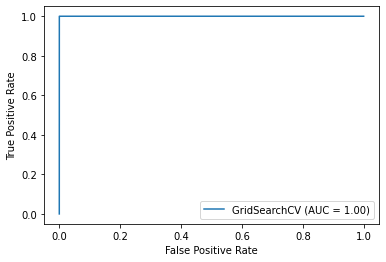

In [52]:
metrics.plot_roc_curve(grid_search, X_val, Y_val)

In [53]:
preds2 = grid_search.predict(X_test)
roc_score2 = metrics.roc_auc_score(Y_test, preds2)
print("Roc Score :\n",roc_score2)

Roc Score :
 0.9999268898961837


# <center><span style="color:#A8AD10;"> Roc Score on the Validation set = 99.99% </span></center>
# <center><span style="color:#A8AD10;"> Roc Score on the Test set = 99.99% </span></center>

